# Bilbiotecas

---

In [821]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn import tree
from sklearn.metrics import  roc_auc_score, confusion_matrix, recall_score, precision_score, f1_score,auc, roc_curve,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay


# Constantes

---

In [822]:
DATAPATH = 'data/1_telecom_customer_churn.csv'
SEED = 42
FP_COST = 100

---

Ler os dados dataset

In [823]:
data = pd.read_csv(DATAPATH)

Apresentar aleatóriamente 5 registos para analisar formato de dados.

In [824]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4364,6741-QRLUP,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),80.30,4995.35,No
3321,3913-RDSJZ,Female,0,Yes,No,64,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.55,1714.95,No
2765,9506-UXUSK,Male,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,931.75,No
5273,7673-BQGKU,Female,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.15,1337.5,No
2274,0320-JDNQG,Male,0,Yes,Yes,23,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,99.85,2331.3,Yes


Obter as dimensões do DataFrame e apresentar o número de linhas (observações) e colunas (variáveis)

In [825]:
print(f"nº de clientes {data.shape[0]}")
print(f"nº de features {data.shape[1]-2}, não foi considerado a coluna Church  pois é a variavel target e a variavel CustomerID poi sé um identificador")

nº de clientes 7043
nº de features 19, não foi considerado a coluna Church  pois é a variavel target e a variavel CustomerID poi sé um identificador


Obter algumas estatísticas descritivas do DataFrame

In [826]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Consultar tipos de dados das variaveis, de destacar que apesar da variavel TotalCharges ser de natureza decimal, está no formato texto (o). Poderá ter valores não decimais na sua constituição.

In [827]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Verificar existência de valores nulos por coluna

In [828]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [829]:
target_counts = data['Churn'].value_counts()
target_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Some Visuals Data

---

Código abaixo  gera três visualizações diferentes para analisar o comportamento de churn (cancelamento) dos clientes, utilizando um esquema de cores preto e branco e um estilo visual com fundo cinza claro.


O gráfico é dividido em três partes lado a lado. No primeiro gráfico, é mostrada a proporção global de churn com uma barra para 'No' e outra para 'Yes' para verificar desbalaceamento da variavel output. No segundo gráfico, apresenta-se o churn por tipo de contrato (Month-to-month, One year, Two year), com barras empilhadas que indicam a proporção de churn em cada grupo. No terceiro gráfico, é feito um boxplot que compara os custos mensais (MonthlyCharges) entre clientes que cancelaram e os que permaneceram, com todos os elementos gráficos (caixas, medianas, pontos extremos) configurados em preto para manter a consistência com o estilo monocromático.

C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_12932\4068449801.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='MonthlyCharges',


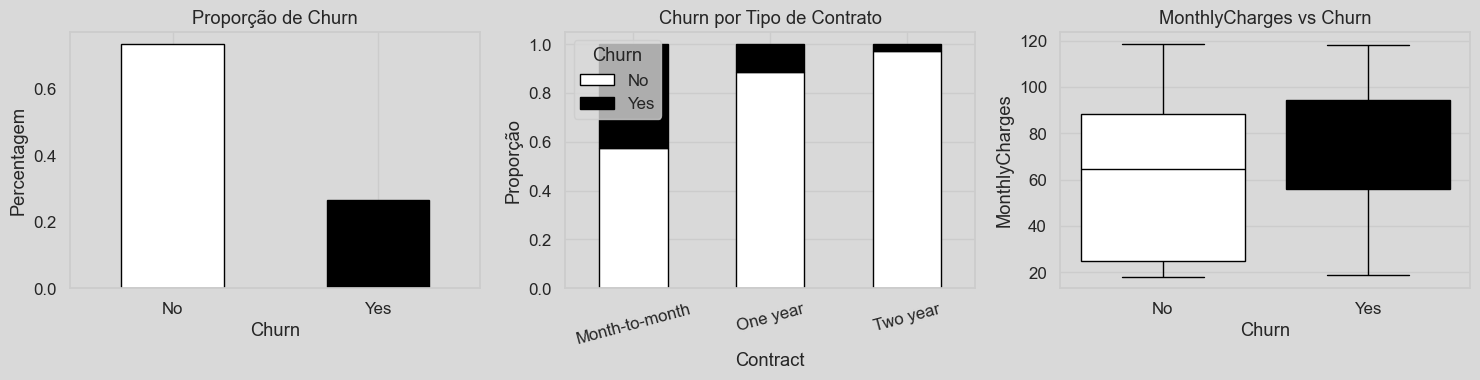

In [ ]:
# Esquema de cores personalizado
churn_palette_bw = {'No': '#FFFFFF', 'Yes': '#000000'}

# Estilo com fundo cinza claro e grelha visível
sns.set_theme(style="whitegrid", font_scale=1.1,
              rc={"axes.facecolor": "#d9d9d9", "figure.facecolor": "#d9d9d9"})

# Garantir que 'Churn' são strings
data['Churn'] = data['Churn'].astype(str)

# Proporções e crosstab
churn_counts = data['Churn'].value_counts(normalize=True)
contract_churn = pd.crosstab(data['Contract'], data['Churn'], normalize='index')

# Criar figura
plt.figure(figsize=(15, 4))

# Gráfico 1: Proporção de churn
plt.subplot(1, 3, 1)
churn_counts[['No', 'Yes']].plot(kind='bar', color=['#FFFFFF', '#000000'], edgecolor='black')
plt.title('Proporção de Churn')
plt.xticks(rotation=0)
plt.ylabel('Percentagem')
plt.grid(axis='y')

# Gráfico 2: Churn por tipo de contrato
plt.subplot(1, 3, 2)
contract_churn[['No', 'Yes']].plot(kind='bar', stacked=True, ax=plt.gca(),
                                   color=['#FFFFFF', '#000000'], edgecolor='black')
plt.title('Churn por Tipo de Contrato')
plt.ylabel('Proporção')
plt.xticks(rotation=15)

# Gráfico 3: Boxplot de MonthlyCharges por Churn
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Churn', y='MonthlyCharges',
            palette=churn_palette_bw,
            flierprops=dict(markerfacecolor='black', marker='o'),
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.title('MonthlyCharges vs Churn')

# Layout final
plt.tight_layout()
plt.show()


A análise inicial dos dados revelou que cerca de 26% dos clientes efetuaram churn, enquanto os restantes 74% permaneceram na empresa. Esta distribuição mostra uma classe ligeiramente desbalanceada, o que é um aspecto importante a considerar durante a modelação preditiva.

Ao analisar a variável tipo de contrato, verificou-se que os clientes com contratos "Month-to-month" apresentam uma taxa de churn significativamente mais elevada. Por outro lado, os contratos com duração de um ou dois anos demonstram maior capacidade de retenção, tornando esta variável particularmente relevante para prever o abandono.

Relativamente aos valores mensais cobrados (MonthlyCharges), observou-se que os clientes que efetuaram churn tendem a ter valores mensais mais altos. Este padrão sugere que o custo poderá estar a influenciar a decisão de cancelar o serviço.

Abaixo são criados quatro gráficos principais:

 -Churn por Tipo de Internet — Mostra a distribuição do churn de acordo com o tipo de serviço de Internet (por exemplo: DSL, Fiber optic, Sem Internet).

 -Churn vs Suporte Técnico — Representa a relação entre a utilização de suporte técnico e o cancelamento de clientes.

 -Churn por Tempo de Permanência (tenure) — Analisa como o churn varia em diferentes faixas de tempo de permanência.

 -Churn por Método de Pagamento — Mostra a distribuição do churn em função do método de pagamento utilizado pelos clientes.

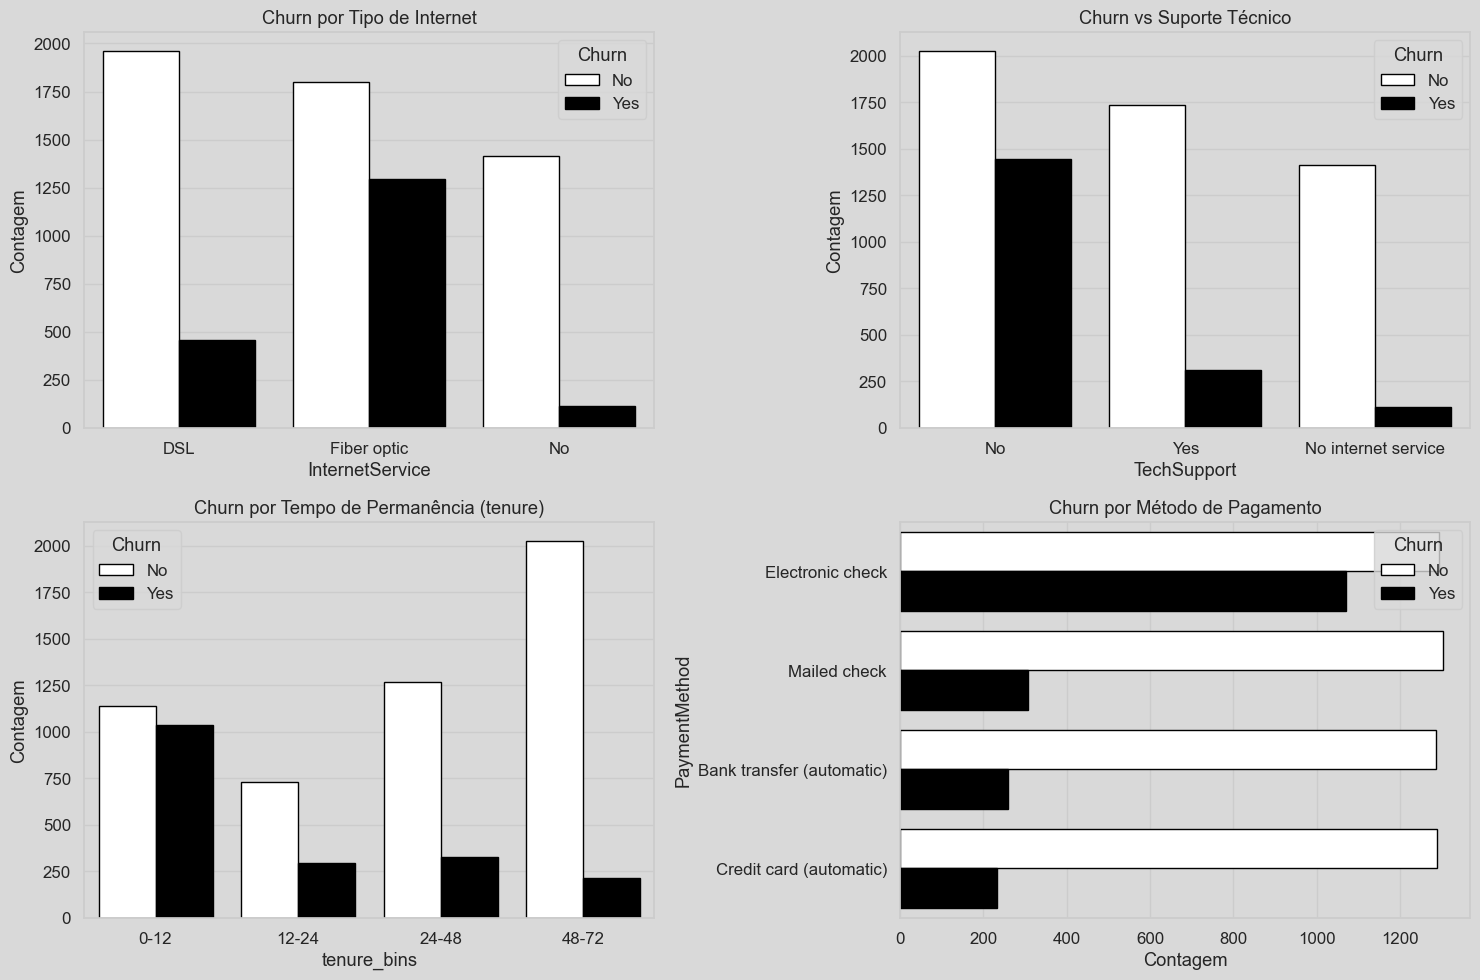

In [831]:
# Garantir que a coluna 'Churn' está como string
data['Churn'] = data['Churn'].astype(str)

# Paleta preto e branco para churn
churn_palette_bw = {'No': '#FFFFFF', 'Yes': '#000000'}

# Estilo com fundo cinza claro
sns.set_theme(style="whitegrid", font_scale=1.1,
              rc={"axes.facecolor": "#d9d9d9", "figure.facecolor": "#d9d9d9"})

# Bins para tenure
data['tenure_bins'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '12-24', '24-48', '48-72'])

# Criar os gráficos
plt.figure(figsize=(15, 10))

# 1. Churn por Tipo de Internet
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='InternetService', hue='Churn',
              palette=churn_palette_bw, edgecolor='black')
plt.title('Churn por Tipo de Internet')
plt.ylabel('Contagem')

# 2. Churn vs Suporte Técnico
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='TechSupport', hue='Churn',
              palette=churn_palette_bw, edgecolor='black')
plt.title('Churn vs Suporte Técnico')
plt.ylabel('Contagem')

# 3. Churn por Tempo de Permanência (com binning)
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='tenure_bins', hue='Churn',
              palette=churn_palette_bw, edgecolor='black')
plt.title('Churn por Tempo de Permanência (tenure)')
plt.ylabel('Contagem')

# 4. Churn por Método de Pagamento
plt.subplot(2, 2, 4)
sns.countplot(data=data, y='PaymentMethod', hue='Churn',
              palette=churn_palette_bw, edgecolor='black')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Contagem')

# Ajuste final
plt.tight_layout()
plt.show()


data.drop(['tenure_bins'],inplace=True,axis=1)

A análise do churn por tipo de internet (InternetService) revelou que os clientes com serviço de "Fiber optic" apresentam uma taxa de churn mais elevada, enquanto os clientes que não têm serviço de internet registam uma taxa de churn bastante baixa.

No que diz respeito ao suporte técnico (TechSupport), verificou-se que ter acesso a suporte técnico contribui para reduzir o churn. Pelo contrário, entre os clientes que não têm suporte, a taxa de churn é visivelmente superior.

Relativamente ao tempo de permanência (tenure), os dados mostram que os clientes com menos de 12 meses de permanência são os que mais abandonam o serviço. A fidelização tende a aumentar com o tempo, o que indica que os clientes mais antigos estão mais propensos a manter-se na empresa.

Por fim, no que toca ao método de pagamento (PaymentMethod), os clientes que pagam com Electronic check apresentam uma taxa de churn mais alta, ao passo que os que utilizam métodos automáticos, como cartão de crédito ou transferência bancária, revelam menor propensão ao abandono.

## Data Transform

---

Nesta secção vão ser aplicadas algumas transformações, de forma a se considerado todas as features possiveis nos modelos, inclusive as variaveis categóricas.

A variavei CustomerID é removida, porque é um identificador, e a variavel TotalCharges apesar de estar no formato string, é uma variavel numerica, pelo que vai ser removida nesta fase de tratamento de variaveis categóricas.

In [832]:
collumns_to_drop = ['customerID','TotalCharges']

No código abaixo são identificadas as variaveis categóricas presentes no DataFrame. Em seguida, para cada uma dessas variaveis, calcular o número de valores únicos, armazenando essa informação num dicionário onde as chaves são os nomes das colunas e os valores representam a contagem de categorias distintas. Para facilitar a visualização, esses dados são organizados num DataFrame, onde cada linha corresponde a uma variável categórica e indica quantos valores únicos ela possui

In [833]:
# Selecionar colunas categóricas
categorical_cols = data.select_dtypes(include=["object"]).columns

categorical_cols = [col for col in categorical_cols if col not in collumns_to_drop]

In [834]:
# Contar valores únicos para cada variável categórica
unique_values_counts = {col: data[col].nunique() for col in categorical_cols}

# Criar DataFrame para exibição
categorical_df = pd.DataFrame(list(unique_values_counts.items()), columns=["Categorical Feature", "Unique Values"])

categorical_df 

,Categorical Feature,Unique Values
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3


No código abaixo são listados todos os valores únicos presentes em cada variável categórica do DataFrame df. Num primeiro momento é criado um dicionário onde as chaves são os nomes das colunas categóricas e os valores correspondem a listas contendo os diferentes valores únicos de cada uma dessas colunas.

In [835]:
# Criar um dicionário com os valores únicos de cada variável categórica
unique_values_dict = {col: data[col].unique().tolist() for col in categorical_cols}

# Criar um DataFrame com os valores apurados em cima
unique_cat_values_df = pd.DataFrame([(col, val) for col, values in unique_values_dict.items() for val in values],
                                columns=["Feature", "Unique Values"])

unique_cat_values_df

,Feature,Unique Values
0,gender,Female
1,gender,Male
2,Partner,Yes
3,Partner,No
4,Dependents,No
5,Dependents,Yes
6,PhoneService,No
7,PhoneService,Yes
8,MultipleLines,No phone service
9,MultipleLines,No


In [836]:
df_categorical_preprocessed = data.select_dtypes(include=["object"]).copy()
df_categorical_preprocessed = df_categorical_preprocessed.drop(columns=collumns_to_drop)
df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


A Função abaixo, transformam variaveis booleanas em numericas,e as variaveis  de termo de contrato em valores numero de meses.

In [837]:
def preprocess_binary_cols_num(df, cols):
    """
    Função para transformar várias variáveis booleanas (com 'Yes'/'No') em numéricas (1/0).

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo as colunas a serem transformadas.
    - cols (list of str): Lista com os nomes das colunas a serem transformadas.

    Retorna:
    - pd.DataFrame: DataFrame com as colunas transformadas.
    """

    for col in cols:
        if col in df.columns:
            df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

    return df


In [838]:
def preprocess_months_cols_num(df, cols):
    """
    Função para transformar várias variáveis contrato meses em valores numéricos nº de  meses.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo as colunas a serem transformadas.
    - cols (list of str): Lista com os nomes das colunas a serem transformadas.

    Retorna:
    - pd.DataFrame: DataFrame com as colunas transformadas.
    """

    for col in cols:
        if col in df.columns:
            df[col] = df[col].map({'Month-to-month': 1, 'One year': 12,'Two year': 24}).astype(int)

    return df


Conversão Variaveis Categoricas em Variaveis Numericas 

In [839]:
collumns_to_convert = ['Partner', 'Dependents', 'PhoneService','Churn']
data_binarycollumns = preprocess_binary_cols_num(df_categorical_preprocessed, collumns_to_convert)

# Concatenar o resultado ao DataFrame original
df_categorical_preprocessed.update(data_binarycollumns)


In [840]:
df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,1,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7039,Female,1,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7040,Female,1,1,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
7041,Male,1,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [ ]:
collumns_to_convert = ['Contract']
data_numeric_months_collumns = preprocess_months_cols_num(df_categorical_preprocessed, collumns_to_convert)

# Concatenar o resultado ao DataFrame original
df_categorical_preprocessed.update(data_numeric_months_collumns)
df_categorical_preprocessed

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,1,Yes,Electronic check,0
1,Male,0,0,1,No,DSL,Yes,No,Yes,No,No,No,12,No,Mailed check,0
2,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No,1,Yes,Mailed check,1
3,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,12,No,Bank transfer (automatic),0
4,Female,0,0,1,No,Fiber optic,No,No,No,No,No,No,1,Yes,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,1,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,12,Yes,Mailed check,0
7039,Female,1,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,12,Yes,Credit card (automatic),0
7040,Female,1,1,0,No phone service,DSL,Yes,No,No,No,No,No,1,Yes,Electronic check,0
7041,Male,1,0,1,Yes,Fiber optic,No,No,No,No,No,No,1,Yes,Mailed check,1


Este bloco de código aplica One-Hot Encoding à variável "gender", convertendo os seus valores em colunas binárias (por exemplo, gender_Female, gender_Male), de forma a torná-los compatíveis com algoritmos de machine learning. Esta variavel poderá ser uma variavel a ser removida, caso se considere que possa haver algum tipo de descriminação de género.

In [843]:
# Inicializar o OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
columns_ohe = ["gender"]

# Ajustar o encoder e transformar os dados
one_hot_encoded = ohe.fit_transform(df_categorical_preprocessed[columns_ohe])
one_hot_columns = ohe.get_feature_names_out(columns_ohe)  # Corrigido

# Criar um DataFrame com os resultados do OHE
ohe_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df_categorical_preprocessed.index)

# Concatenar o resultado ao DataFrame original
df_transformed = pd.concat([df_categorical_preprocessed, ohe_df], axis=1)

# Remover a coluna original
df_transformed.drop(columns=columns_ohe, inplace=True)

# Exibir 15 linhas aleatórias do DataFrame atualizado para verificar o resultado
df_transformed.sample(15)

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
5395,0,0,1,No,Fiber optic,No,No,No,No,Yes,No,1,Yes,Credit card (automatic),1,1.0,0.0
2649,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,24,No,Credit card (automatic),0,1.0,0.0
4272,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,24,Yes,Credit card (automatic),1,0.0,1.0
1943,0,0,1,Yes,DSL,No,No,No,No,No,No,1,Yes,Credit card (automatic),0,0.0,1.0
6983,0,0,1,No,Fiber optic,No,Yes,Yes,Yes,No,No,1,No,Bank transfer (automatic),0,1.0,0.0
2367,0,0,1,No,Fiber optic,No,No,Yes,No,Yes,No,1,Yes,Credit card (automatic),1,1.0,0.0
5773,0,0,1,No,DSL,Yes,Yes,Yes,No,No,No,1,No,Electronic check,0,1.0,0.0
4903,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,1,Yes,Electronic check,1,1.0,0.0
6235,1,1,0,No phone service,DSL,Yes,No,No,No,No,Yes,1,No,Mailed check,1,0.0,1.0
6074,1,0,0,No phone service,DSL,No,No,No,No,No,No,1,Yes,Electronic check,1,0.0,1.0


Aplicação de Label Encoding nas restantes variáveis categóricas

In [844]:
# Aplicar Label Encoding nas restantes variáveis categóricas
label_encoders = {}
for col in df_transformed.select_dtypes(include=["object"]).columns:
      le = LabelEncoder()
      df_transformed[col] = le.fit_transform(df_transformed[col])
      label_encoders[col] = le

In [845]:
df_transformed

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
0,1,0,0,1,0,0,2,0,0,0,0,1,1,2,0,1.0,0.0
1,0,0,1,0,0,2,0,2,0,0,0,12,0,3,0,0.0,1.0
2,0,0,1,0,0,2,2,0,0,0,0,1,1,3,1,0.0,1.0
3,0,0,0,1,0,2,0,2,2,0,0,12,0,0,0,0.0,1.0
4,0,0,1,0,1,0,0,0,0,0,0,1,1,2,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,2,0,2,0,2,2,2,2,12,1,3,0,0.0,1.0
7039,1,1,1,2,1,0,2,2,0,2,2,12,1,1,0,1.0,0.0
7040,1,1,0,1,0,2,0,0,0,0,0,1,1,2,0,1.0,0.0
7041,1,0,1,2,1,0,0,0,0,0,0,1,1,3,1,0.0,1.0


Passar as feature categoricas tratadas, para o dataframe principal

In [846]:
data.update(df_transformed)
data.drop(columns=['gender','customerID'], inplace=True)

Tratar a Feature TotalCharges, que está em formato string para numérico.

In [847]:
# Converter para float (valores inválidos ficam como NaN)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')


In [848]:
media_por_contrato = data.groupby("Contract")["TotalCharges"].mean()
media_por_contrato

Contract
1     1369.254581
12    3034.683084
24    3728.933947
Name: TotalCharges, dtype: float64

In [849]:
data["TotalCharges"] = data.groupby("Contract")["TotalCharges"].transform(
    lambda x: x.fillna(x.mean())
)

In [850]:
data.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [851]:
data.sample(15)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4988,0,1,0,26,1,0,2,1,1,1,1,1,1,12,0,3,19.20,459.60,0
649,1,0,0,24,1,0,1,0,0,0,0,0,0,1,0,1,70.00,1732.60,0
2721,1,0,0,10,1,0,1,0,0,0,0,0,2,1,1,2,79.25,793.55,1
5227,0,0,0,7,1,2,1,0,0,0,0,2,2,1,0,2,96.20,639.70,0
5214,0,1,1,2,1,0,1,0,2,0,0,0,0,1,1,0,73.55,145.40,1
6723,0,0,0,46,1,0,2,1,1,1,1,1,1,24,0,0,20.05,902.00,0
2577,0,0,0,1,1,2,1,0,0,0,0,2,2,1,1,2,94.60,94.60,1
4891,0,1,0,4,1,2,0,0,0,2,0,2,0,1,0,2,65.60,250.10,0
5720,0,0,0,32,1,2,1,0,2,2,0,2,2,12,1,1,104.05,3416.85,0
3815,0,0,0,3,1,2,1,0,0,0,0,0,0,1,1,2,74.25,210.30,1


Tendo terminado o préprocessamento de dados no passo anterior, o código abaixo tem como objetivo identificar as variáveis mais importantes para a previsão do modelo, utilizando um Random Forest Classifier. O processo inicia-se com a criação e o treino do modelo, onde um RandomForestClassifier com 100 árvores de decisão é ajustado aos dados de treino (X_train e y_train).

Após o treino, calcula-se a importância das features com base na métrica Mean Decrease in Impurity (MDI), que avalia o impacto de cada variável na redução da impureza ao longo das divisões das árvores. Para aumentar a robustez da análise, é também calculado o desvio padrão da importância das features entre todas as árvores da floresta, refletindo a variabilidade da relevância de cada variável dentro do modelo.

Os resultados são armazenados num DataFrame, onde cada linha corresponde a uma variável e contém três colunas principais:

Nome da variável.
Importance – Grau de influência da variável no modelo.
Std – Desvio padrão da importância da variável ao longo das árvores do Random Forest.
No final as variáveis são ordenadas por ordem decrescente de importância. Além disso, é calculada a importância acumulada, que permite visualizar a percentagem da capacidade preditiva explicada pelas variáveis mais relevantes.

A função split_data tem como objetivo dividir um conjunto de dados num conjunto de treino e num conjunto de teste, permitindo ainda a opção de reduzir o tamanho do conjunto de treino através de amostragem.

In [852]:
def split_data(df, target_column, test_size=0.2, seed=None,sample_fraction=1):
    """
    Divide os dados em conjuntos de treino e teste, com a opção de reduzir o tamanho do conjunto de treino.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados.
    target_column (str): Nome da coluna alvo (variável dependente).
    test_size (float, opcional): Proporção dos dados a serem usados como teste. Padrão é 0.2 (20%).
    seed (int, opcional): Semente para reprodutibilidade dos dados.
    sample_fraction (float, opcional): Fração do conjunto de treino a ser usada, Padrão é 1 (100%).

    Retorna:
    X_train, X_test, y_train, y_test (DataFrames/Series): Conjuntos de treino e teste.
    """
    # Divisão entre treino e teste
    train_set, test_set = train_test_split(df, test_size=test_size, random_state=seed)

    # Aplicação da amostragem caso seja necessário
    if sample_fraction < 1:
        train_set = train_set.sample(frac=sample_fraction, random_state=seed)

    # Separação das variáveis independentes e dependente
    X_train = train_set.drop(columns=[target_column])
    y_train = train_set[target_column]
    X_test = test_set.drop(columns=[target_column])
    y_test = test_set[target_column]

    return X_train, X_test, y_train, y_test

In [853]:
X_train, X_test, y_train, y_test = split_data(df_transformed, target_column='Churn', test_size=0.2, seed=SEED, sample_fraction=1)

In [854]:
# Criar e treinar o modelo
selected_model = RandomForestClassifier(n_estimators=100, random_state=42)
selected_model.fit(X_train, y_train)

# Calcular a importância das features e o desvio padrão entre as árvores
std = np.std([tree.feature_importances_ for tree in selected_model.estimators_], axis=0)

# Criar o DataFrame com os resultados
random_forest_importances = pd.DataFrame.from_dict({
    "Feature": X_train.columns,
    "Importance": selected_model.feature_importances_,
    "Std": std
}).sort_values(by="Importance", ascending=False)

# Calcular a importância acumulada
random_forest_importances["Cumulative Importance"] = random_forest_importances["Importance"].cumsum() / random_forest_importances["Importance"].sum()

random_forest_importances

,Feature,Importance,Std,Cumulative Importance
11,Contract,0.145317,0.046244,0.145317
13,PaymentMethod,0.135258,0.023619,0.280575
5,OnlineSecurity,0.083705,0.041785,0.364280
8,TechSupport,0.068362,0.034539,0.432643
3,MultipleLines,0.062108,0.010928,0.494750
0,Partner,0.059950,0.014216,0.554700
6,OnlineBackup,0.059300,0.017472,0.614000
7,DeviceProtection,0.055896,0.013753,0.669897
10,StreamingMovies,0.054623,0.012341,0.724520
9,StreamingTV,0.054472,0.011147,0.778992


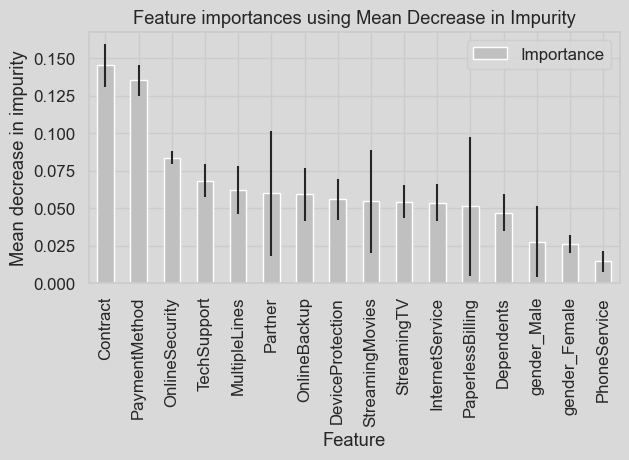

In [855]:
fig, ax = plt.subplots()
random_forest_importances.plot.bar(x="Feature", y="Importance",yerr=std, ax=ax,color="silver")
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Após a análise acima, são selecionadas as 11 features mais importantes, que explicam mais de 80% da variavel target. Poderia ser feito algum tipo de pca para redução de features, mas tendo em conta a gestão de tempo deixamos cair essa possibilidade.

In [856]:
# Selecionar as 5 features mais importantes
top_features = random_forest_importances["Feature"].head(11).tolist()

# Criar um novo DataFrame com as top 5 features + variável target 'Churn'
df_transformed = df_transformed[top_features + ['Churn']]

Para identificar se todas as variaveis são independentes, nas células abaixo foi calculada a correlação entre as variaveis.

<Axes: >

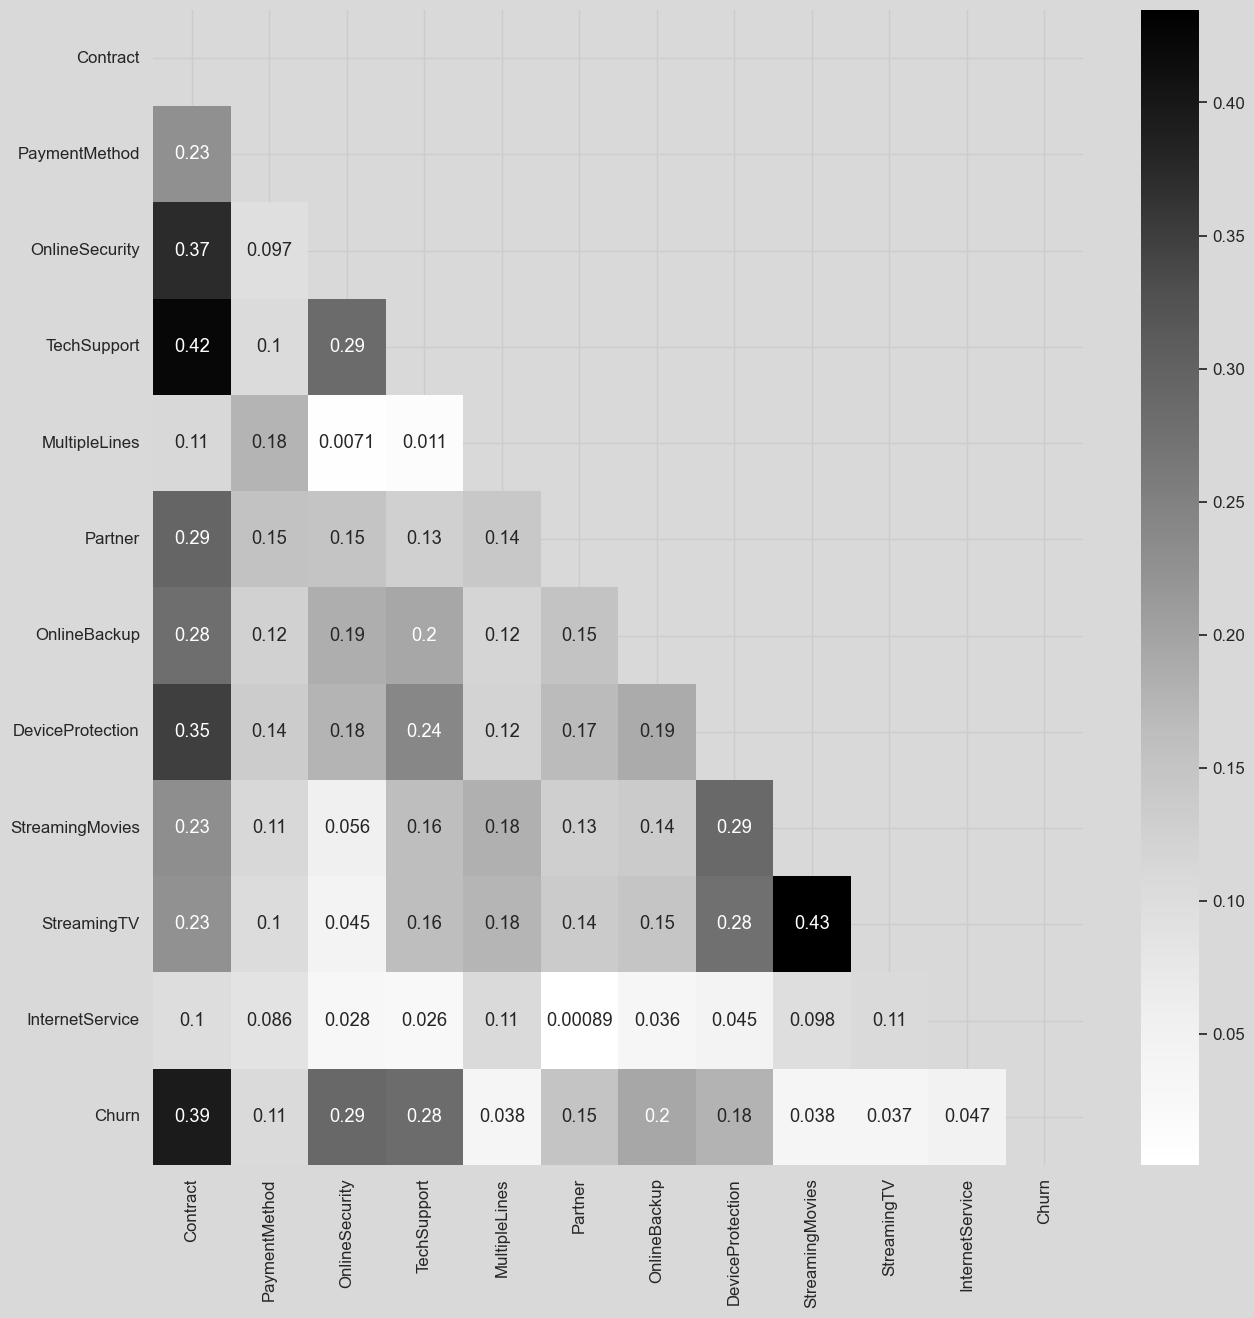

In [857]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_transformed.corr().abs(), annot=True, cmap = "Greys",ax=ax, mask = np.triu(np.ones_like(df_transformed.corr().abs(), dtype=bool)))

# Aplicação Modelos de Machine Learnings

---

In [858]:
data.update(df_transformed)

data.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,12,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,1,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,12,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,2,70.70,151.65,1


In [859]:
X_train, X_test, y_train, y_test = split_data(df_transformed, target_column='Churn', test_size=0.2, seed=SEED, sample_fraction=1)

A função train_models_with_gridsearch foi desenvolvida para aplicar o treino e otimização de múltiplos modelos de machine learning, utilizando o método GridSearchCV de forma a encontrar os melhores hiperparâmetros. Além de realizar o ajuste dos modelos, a função regista o tempo de execução de cada treino, permitindo uma análise da eficiência computacional de cada algoritmo.

O processo inicia-se com a iteração sobre a lista models_and_params, onde cada item contém o nome do modelo, o classificador correspondente e um dicionário de hiperparâmetros a serem testados. Para cada modelo, a função mede o tempo total de treino, executa o GridSearchCV com validação cruzada (cv), e armazena os resultados numa lista denominada grid_search_results. Paralelamente, o tempo de execução de cada modelo é registado num dicionário dentro da lista resource_usage, permitindo comparações entre os diferentes algoritmos em termos de custo computacional.

In [860]:
def train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test, cv=5):
    """
    Treina múltiplos modelos usando GridSearchCV, regista o tempo de execução e guarda os melhores resultados.

    Parâmetros:
    - models_and_params: Lista contendo (nome_do_modelo, classificador, hiperparâmetros).
    - X_train: Conjunto de treino (features).
    - y_train: Conjunto de treino (labels).
    - X_test: Conjunto de teste (features).
    - y_test: Conjunto de teste (labels).
    - cv: Número de folds para cross-validation (default = 5).

    Retorna:
    - grid_search_results: Lista com os resultados de GridSearchCV para cada modelo.
    - resource_usage: Lista de dicionários contendo o tempo de treino de cada modelo.
    - grid_search_results_overall: m dicionário com os resultados de todos os modelos e o melhor modelo encontrado.
    """
    grid_search_results = []
    resource_usage = []
    results = []

    best_model_name = None
    best_roc_auc = 0

    for model_str, clf, params in models_and_params:
        print(f"Treinando modelo: {model_str}...")

        # Medir tempo de treino
        start_time = time.time()
        grid_search_result = GridSearchCV(clf, params, cv=cv).fit(X_train, y_train)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Guardar resultado
        grid_search_results.append(grid_search_result)
        resource_usage.append({
            "model": model_str,
            "training_time": elapsed_time
        })

        # Obter o melhor modelo encontrado
        best_estimator = grid_search_result.best_estimator_

        #Se o modelo suporta predict_proba(), ele retorna a probabilidade da classe positiva
        if hasattr(best_estimator, "predict_proba"):
            y_proba = best_estimator.predict_proba(X_test)[:, 1]
        else:
            y_scores = best_estimator.decision_function(X_test)
            y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())  # Normalização

        # Calcular roc_auc
        roc_auc = roc_auc_score(y_test, y_proba)

        # Guardar resultados em lista para DataFrame
        results.append({
            "Modelo": model_str,
            "ROC AUC": round(roc_auc, 4),
            "Tempo de Treino (s)": round(elapsed_time, 2)
        })

        # Verificar se este modelo é o melhor até agora
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_model_name = model_str

        print(f"Modelo {model_str} concluído em {elapsed_time:.2f} segundos. ROC AUC: {roc_auc:.4f}\n")

    # Criar DataFrame com os resultados de todos os modelos
    df_grid_search_results = pd.DataFrame(results)

    # Criar DataFrame para armazenar o melhor modelo
    df_best_model = pd.DataFrame([{
        "model_name": best_model_name,
        "ROC AUC": best_roc_auc
    }])

    # Criar um dicionário contendo os resultados gerais
    grid_search_results_overall = {
        "df_grid_search_results": df_grid_search_results,
        "df_best_model": df_best_model
    }

    return grid_search_results, resource_usage, grid_search_results_overall

A função plot_roc_curves foi criada para gerar um gráfico da curva ROC (Receiver Operating Characteristic), permitindo a visualização comparativa do desempenho dos modelos treinados. A curva ROC é uma das principais métricas para avaliar classificadores binários, pois mede a capacidade do modelo em distinguir entre classes positivas e negativas em diferentes limiares de decisão.

In [861]:
def plot_roc_curves(models_and_params, grid_search_results, X_test, y_test):
    """
    Cria Gráfico plot para curva ROC para múltiplos modelos treinados.

    Parâmetros:
    - models_and_params: Lista contendo (nome_do_modelo, classificador, hiperparâmetros).
    - grid_search_results: Lista com os resultados do GridSearchCV para cada modelo.
    - X_test: Conjunto de features de teste.
    - y_test: Labels reais do conjunto de teste.

    Retorna:
    - Exibe um gráfico com as curvas ROC de todos os modelos.
    """
    fig, ax_roc = plt.subplots(1, 1, figsize=(12, 10))

    for i in range(len(models_and_params)):
        RocCurveDisplay.from_estimator(
            grid_search_results[i].best_estimator_,
            X_test,
            y_test,
            ax=ax_roc,
            name=models_and_params[i][0]
        )

    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    ax_roc.grid(linestyle="--")
    plt.legend()
    plt.show()

A função plot_training_time foi desenvolvida para gerar um gráfico de barras que apresenta o tempo de treino de cada modelo, permitindo uma análise comparativa da eficiência computacional dos diferentes algoritmos utilizados no projeto.

In [862]:
def plot_training_time(resource_usage):
    """
    Cria gráfico plot com o tempo de treino de cada modelo.

    Parâmetros:
    - resource_usage: Lista de dicionários contendo 'model' e 'training_time'.

    Retorna:
    - Exibe um gráfico de barras mostrando o tempo de treino por modelo.
    """
    # Criar DataFrame com os dados de consumo de recursos
    df_resource_usage = pd.DataFrame(resource_usage)

    # Criar a figura para o gráfico
    plt.figure(figsize=(10, 6))

    # Criar gráfico de barras para o tempo de treino por modelo
    ax = sns.barplot(x="model", y="training_time", data=df_resource_usage, color="grey")

    # Apresentar valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Valor formatado com 2 casas decimais
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Posição do texto
                    ha='center', va='bottom',  # Alinhamento
                    fontsize=12, color='black', fontweight='bold')  # Estilo do texto

    # Configurar título e rótulos do gráfico
    plt.title("Tempo de Treino por Modelo")
    plt.ylabel("Tempo (segundos)")
    plt.xlabel("Modelo")
    plt.xticks(rotation=45)

    # Exibir o gráfico
    plt.show()

In [900]:
def get_estimator_config(models_and_params, estimator_name):
    """
    Retorna a configuração completa de um estimador específico, mantendo o formato original do tuplo.

    Parâmetros:
    - models_and_params: Lista de tuplas contendo (nome, modelo ou pipeline, hiperparâmetros).
    - estimator_name: Nome do estimador a ser buscado.

    Retorna:
    - Uma tupla (nome, modelo ou pipeline, hiperparâmetros) se o estimador for encontrado.
    - None se o nome do estimador não existir na lista.
    """
    for config in models_and_params:
        name, model, params = config
        if name == estimator_name:
            return config  # Retorna a tupla completa como está no dataset

    return None  # Retorna None se o estimador não for encontrado

## Find best hiperparameters in SVM

---

O código abaixo apresentado define diferentes configurações do Suporte Vector Machine (SVM) juntamente com os seus hiperparâmetros para otimização, garantindo que o modelo seja ajustado para obter o melhor desempenho possível. Para tal, num primeiro momento foram criadas três variações do SVM (svm, svm2, svm3), cada uma com diferentes configurações de kernel, parâmetros C, e valores de gamma, com o objetivo de encontrar a combinação ideal para maximizar a capacidade preditiva do modelo.

In [866]:
models_and_params = [
    (
        'svm',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', SVC(random_state = SEED))
        ]),
        {
          "Classifier__C": [0.1, 1, 10],
          "Classifier__gamma": np.logspace(-9, 3, 10),
          "Classifier__kernel": ["linear"]
        }
    ),

    (
    'svm2',
    Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('Classifier', SVC(random_state=SEED))  # Adicionado probability=True
    ]),
    {
      "Classifier__C": [0.1, 1, 10],
      "Classifier__gamma": np.logspace(-4, 1, 6),  # Valores mais práticos de gamma
      "Classifier__kernel": ["rbf"]
    }
   )

]

In [867]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)


Treinando modelo: svm...
Modelo svm concluído em 80.98 segundos. ROC AUC: 0.8039

Treinando modelo: svm2...
Modelo svm2 concluído em 79.09 segundos. ROC AUC: 0.8110



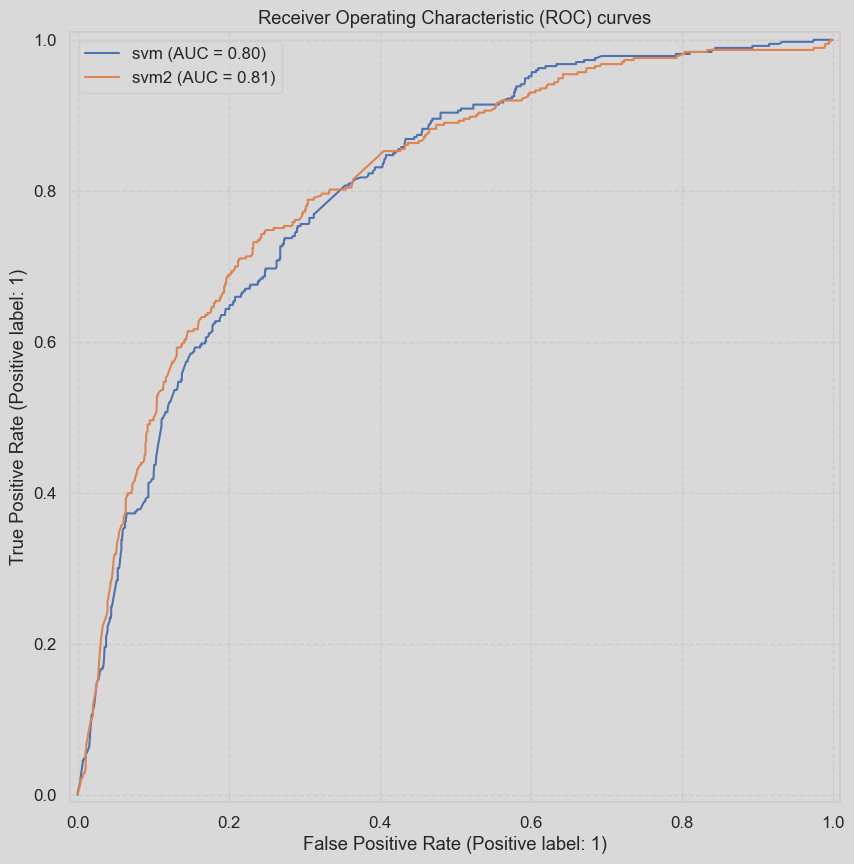

In [868]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

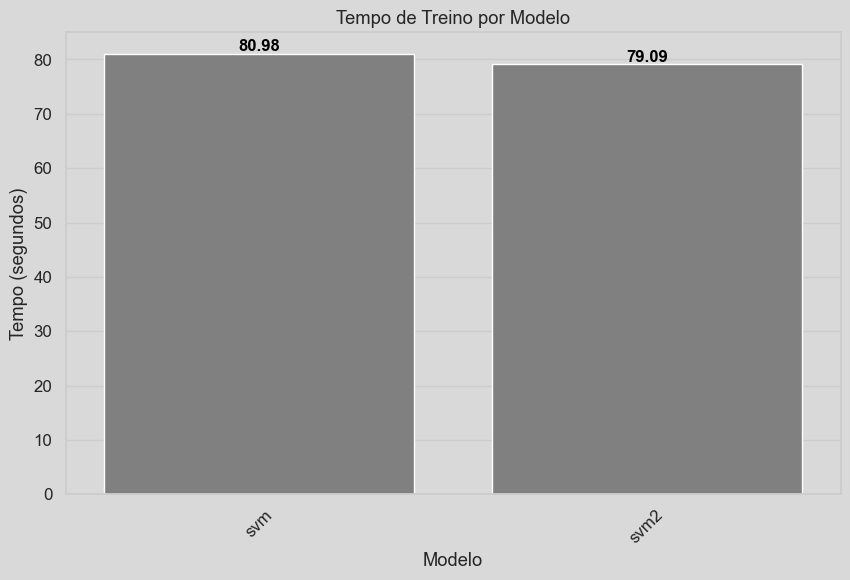

In [869]:
plot_training_time(resource_usage)

A linha de código abaixo executa a função get_estimator_config, que extrai a configuração otimizada do melhor modelo encontrado no processo de Grid Search. Este modelo será utilizado para cross validation com a outra classe de algoritmos.

In [870]:
svm_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
svm_optimized

('svm2',
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('Classifier', SVC(random_state=42))]),
 {'Classifier__C': [0.1, 1, 10],
  'Classifier__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
  'Classifier__kernel': ['rbf']})

## Find best hiperparameters in Decision Tree

---

O código define um conjunto de modelos de decision tree juntamente com os seus hiperparâmetros para otimizaçãoo, variando parâmetros essenciais como profundidade da árvore (max_depth), critério de divisão (criterion), método de divisão (splitter), e restrições de amostragem (min_samples_split, min_samples_leaf). A estrutura do código permite comparar múltiplas variações do Decision Tree, desde configurações mais simples até configurações com maior regularização.

In [871]:
models_and_params = [

    (
        'decision_tree',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth':[2, 4, 6,8],
            'min_samples_split': [2, 4, 6, 10],
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    ),

     (
        'decision_tree2',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth': [2, 5, 10, 20, None],  # Testar árvores mais profundas
            'min_samples_split': [2, 4, 6, 10],
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    ),

         (
        'decision_tree3',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth': [2, 5, 10, 20, None],  # Testar árvores mais profundas
            'min_samples_split': [2, 5, 10, 20, 50],  # Evita overfitting
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    ),


             (
        'decision_tree4',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth': [2, 5, 10, 20, None],  # Testar árvores mais profundas
            'min_samples_split': [2, 5, 10, 20, 50],  # Evita overfitting
            'criterion': ["gini",],
            'splitter': ["best","random"],
            'min_samples_leaf': [1, 4, 10, 20, 50],  # Regularização extra
        }
    ),

        (
        'decision_tree5',
        tree.DecisionTreeClassifier(random_state = SEED),
        {
            'max_depth':[2, 4, 6,8],
            'min_samples_split': [2, 4, 6, 10],
            'criterion': ["gini", "entropy"],  # Testar diferentes critérios
            'splitter': ["best","random"],
            'min_samples_leaf': [1,4,10]
        }
    )
]

In [872]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: decision_tree...
Modelo decision_tree concluído em 5.48 segundos. ROC AUC: 0.8300

Treinando modelo: decision_tree2...
Modelo decision_tree2 concluído em 7.14 segundos. ROC AUC: 0.8263

Treinando modelo: decision_tree3...
Modelo decision_tree3 concluído em 8.88 segundos. ROC AUC: 0.8192

Treinando modelo: decision_tree4...
Modelo decision_tree4 concluído em 16.01 segundos. ROC AUC: 0.8342

Treinando modelo: decision_tree5...
Modelo decision_tree5 concluído em 11.33 segundos. ROC AUC: 0.8300



c:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


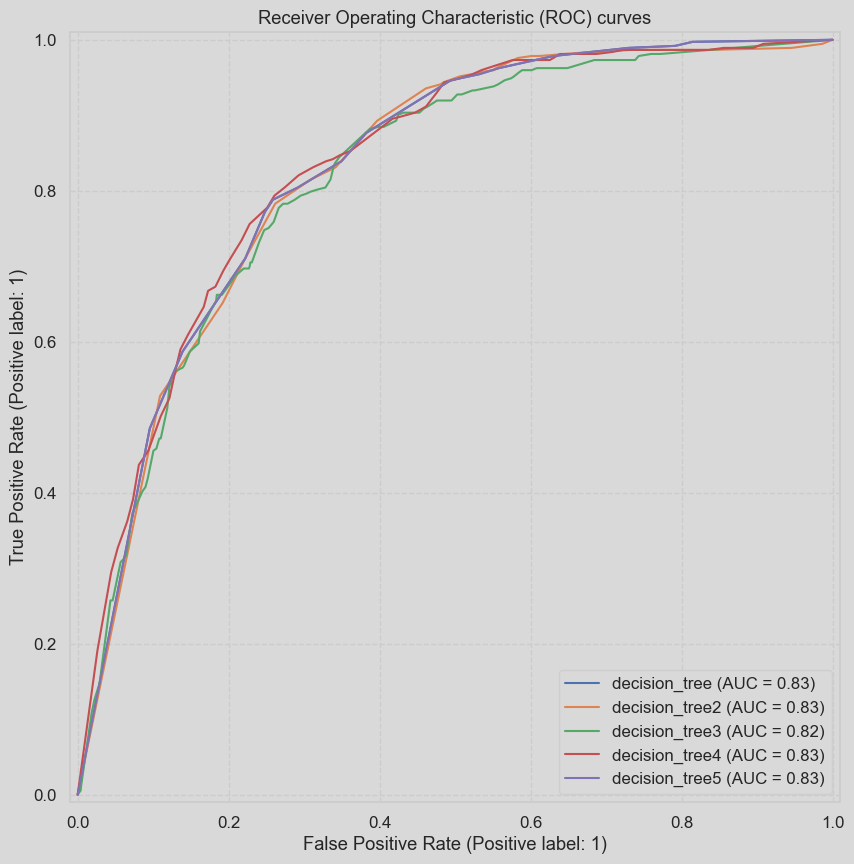

In [873]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

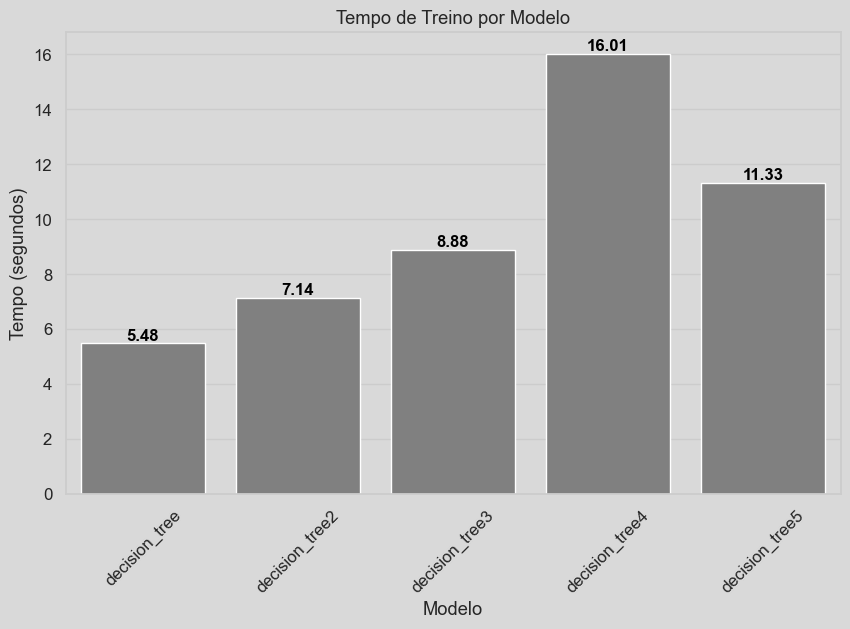

In [874]:
plot_training_time(resource_usage)

In [875]:
decision_tree_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
decision_tree_optimized

('decision_tree4',
 DecisionTreeClassifier(random_state=42),
 {'max_depth': [2, 5, 10, 20, None],
  'min_samples_split': [2, 5, 10, 20, 50],
  'criterion': ['gini'],
  'splitter': ['best', 'random'],
  'min_samples_leaf': [1, 4, 10, 20, 50]})

## Find best hiperparameters in Random Forest

---

A estratégia adotada para a otimização dos hiperparâmetros do modelo Random Forest baseou-se na seleção de diferentes configurações, permitindo avaliar o impacto de várias combinações de hiperparâmetros no desempenho do modelo. Para isso, foram criadas duas configurações distintas de Random Forest, cada uma explorando diferentes níveis de complexidade e regularização.

In [876]:
models_and_params = [

    (
        'random_forest',
        RandomForestClassifier(random_state = SEED),
        {
            'n_estimators':[10, 100, 300,500],
            'max_depth':[2, 4, 6]
        }
    ),
        (
        'random_forest2',
        RandomForestClassifier(random_state = SEED),
        {
            'n_estimators':[50, 100, 300, 500],
            'max_depth':[5, 10, 20, None]
        }
    )

]

In [877]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: random_forest...
Modelo random_forest concluído em 39.49 segundos. ROC AUC: 0.8428

Treinando modelo: random_forest2...
Modelo random_forest2 concluído em 79.02 segundos. ROC AUC: 0.8424



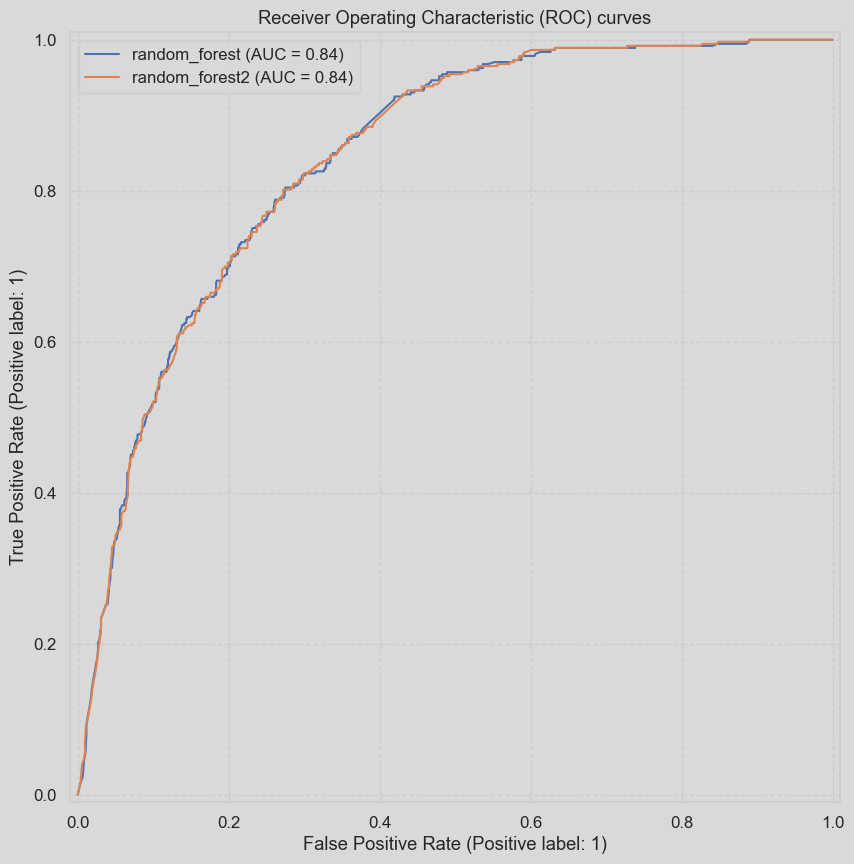

In [878]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

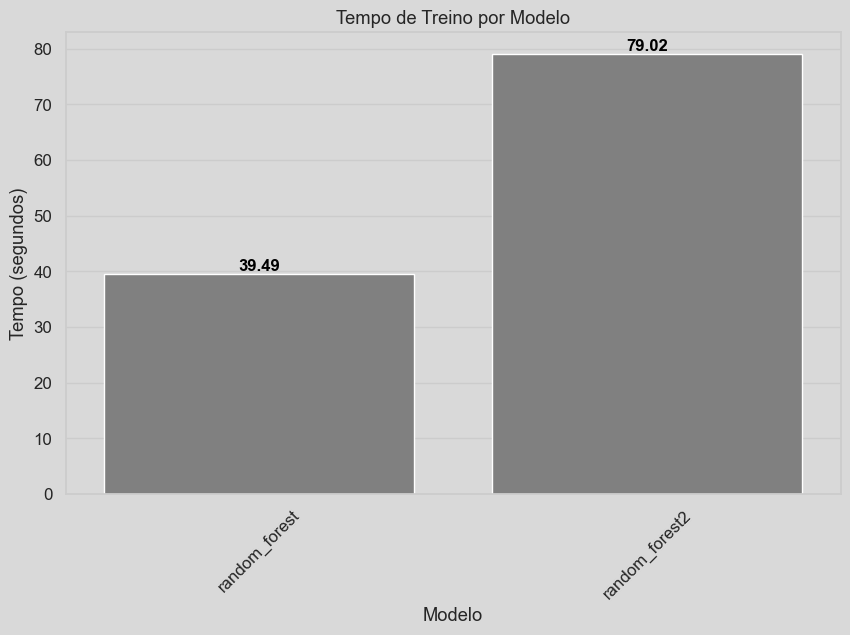

In [879]:
plot_training_time(resource_usage)

In [880]:
random_forest_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
random_forest_optimized

('random_forest',
 RandomForestClassifier(random_state=42),
 {'n_estimators': [10, 100, 300, 500], 'max_depth': [2, 4, 6]})

## Find best hiperparameters in Regressão Logistica

---

O código abaixo define o conjunto de configurações utilizados no algoritmo Regressão Logistica juntamente com os seus hiperparâmetros para otimização

In [881]:
models_and_params = [

    (
        'logit',
        Pipeline(steps=[
            ('scaler', MinMaxScaler()),
            ('Classifier', LogisticRegression(random_state = SEED))
        ]),
        {
          "Classifier__C": [0.1, 1, 10, 100],
          "Classifier__penalty": ['l2'],
        }
    )
]

In [882]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: logit...
Modelo logit concluído em 0.50 segundos. ROC AUC: 0.8182



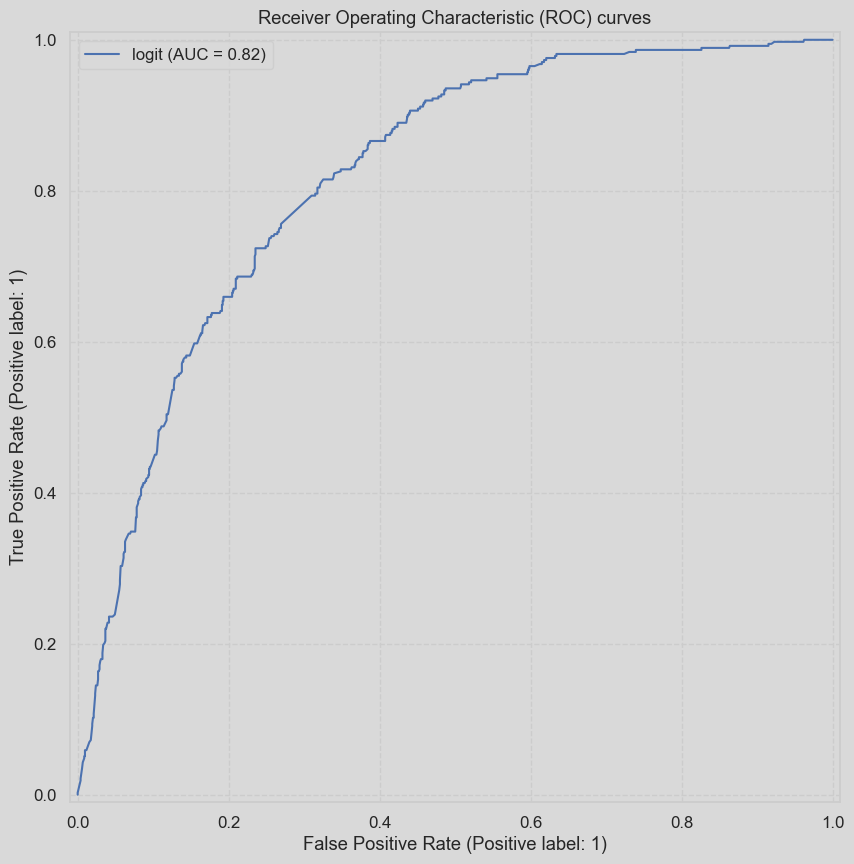

In [883]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

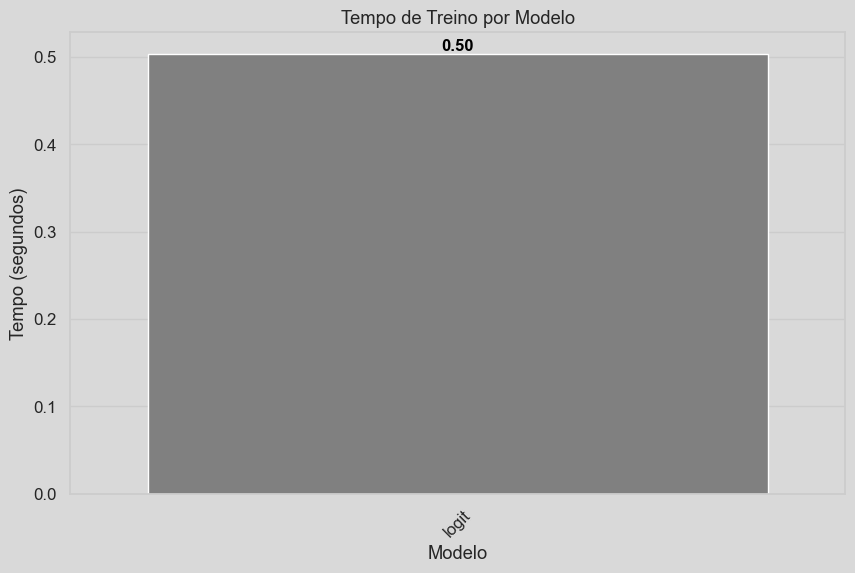

In [884]:
plot_training_time(resource_usage)

In [885]:
logit_optimized = get_estimator_config(models_and_params, grid_search_results_overall["df_best_model"]["model_name"].iloc[0])
logit_optimized

('logit',
 Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('Classifier', LogisticRegression(random_state=42))]),
 {'Classifier__C': [0.1, 1, 10, 100], 'Classifier__penalty': ['l2']})

## Cross Validation entre diferentes Algoritmos

----

Após identificar a melhor configuração dentro de cada algoritmo, é implementado um pipeline com todas as classes de algoritmos preditivos sendo representado cada um a configuração que obteve melhor resultado dentro da análise do ponto anterior

In [886]:
models_and_params = [
   random_forest_optimized,
   decision_tree_optimized,
   svm_optimized,
   logit_optimized
]

In [887]:
grid_search_results, resource_usage, grid_search_results_overall = train_models_with_gridsearch(models_and_params, X_train, y_train, X_test, y_test)

Treinando modelo: random_forest...
Modelo random_forest concluído em 46.22 segundos. ROC AUC: 0.8428

Treinando modelo: decision_tree4...
Modelo decision_tree4 concluído em 11.63 segundos. ROC AUC: 0.8342

Treinando modelo: svm2...
Modelo svm2 concluído em 83.37 segundos. ROC AUC: 0.8110

Treinando modelo: logit...
Modelo logit concluído em 0.53 segundos. ROC AUC: 0.8182



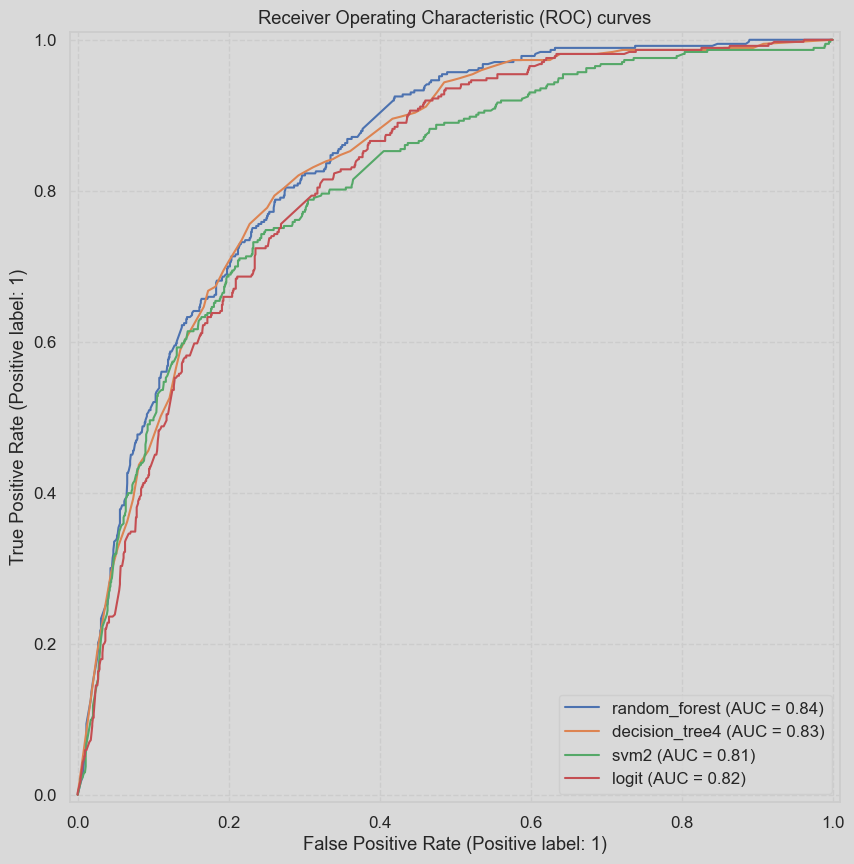

In [888]:
plot_roc_curves(models_and_params, grid_search_results, X_test, y_test)

No gráfico, observa-se que o modelo Random Forest (random_forest2) obteve a maior ROC AUC, com um valor de 0,84, sugerindo que apresenta o melhor desempenho na distinção entre classes positivas e negativas.

O modelo Árvore de Decisão (decision_tree) registou um ROC AUC de 0,83, ficando ligeiramente atrás do Random Forest, mas ainda demonstrando um bom desempenho preditivo. 

A Regressão Logística otimizada (logit_RandomSearchCV) obteve um ROC AUC de 0,82, o que indica um desempenho razoável, mas inferior ao de modelos baseados em árvores. Por outro lado, o Support Vector Machine (SVM) registou o menor desempenho, com um ROC AUC de 0,81.

Embora a métrica ROC AUC seja uma referência útil para avaliar a capacidade dos modelos de distinguir entre classes positivas e negativas, não é suficiente para determinar o melhor modelo para o problema em questão. O ROC AUC fornece uma visão geral do desempenho do modelo em diferentes limiares de decisão, mas não considera os impactos reais das classificações corretas e incorretas no contexto do negócio.

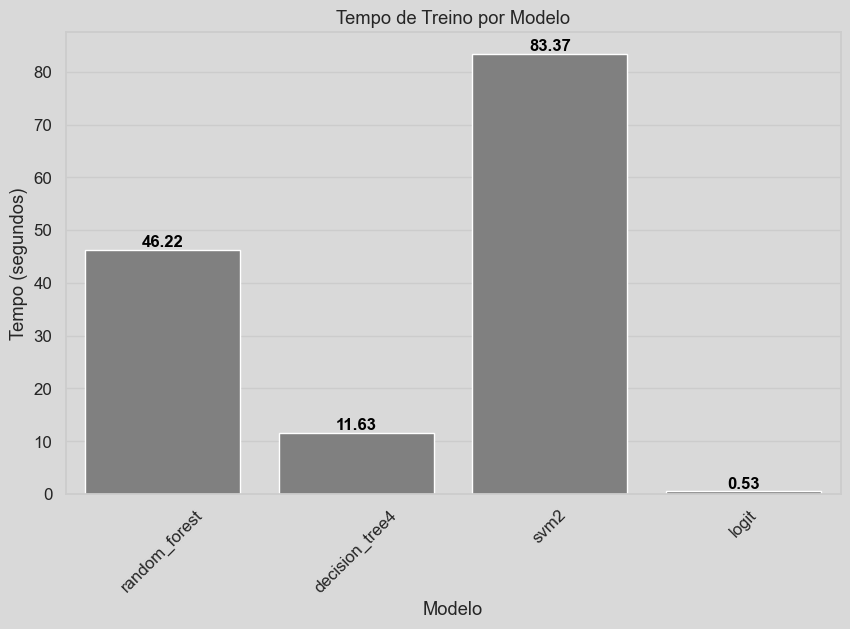

In [889]:
plot_training_time(resource_usage)

Na prática, a escolha do modelo mais adequado deve considerar não apenas a sua capacidade discriminativa, mas também o custo associado às decisões tomadas com base nas previsões. Por exemplo, um modelo pode apresentar um valor elevado de ROC AUC, mas gerar um número excessivo de falsos positivos ou falsos negativos, o que pode ter implicações significativas consoante o problema em análise.

## Métricas

---

O bloco de código abaixo avalia o desempenho de vários modelos de machine learning previamente ajustados através de `GridSearchCV`. Para cada modelo, são calculadas métricas clássicas de classificação como precisão, recall, F1-score e ROC AUC. Além disso, é feita uma análise orientada para o impacto no negócio, através do cálculo dos custos associados aos erros de previsão: os falsos positivos (clientes contactados para negociação de contrato, quando não tencionavam abandonar) e os falsos negativos (clientes que abandoram o serviço sem serem detectados pelo modelo).

O custo dos falsos negativos é calculado multiplicando o valor mensal cobrado (`MonthlyCharges`) pela duração do contrato, permitindo estimar o prejuízo por cliente perdido. Por sua vez, o custo dos falsos positivos resulta da multiplicação do número de casos por um valor fixo de retenção. Também é calculado o custo do cenário base (sem modelo), que corresponde à perda de todos os clientes com churn real. A poupança gerada por cada modelo corresponde à diferença entre o custo base e o custo total com o modelo.

No final, todos os resultados são guardados numa lista e convertidos num `DataFrame` para facilitar a análise comparativa entre modelos, permitindo identificar não apenas o melhor desempenho técnico, mas também a solução mais vantajosa do ponto de vista económico.


,Modelo,Precisão,Recall,F1-Score,ROC AUC,FNs,Custo médio FN (€),Custo FP (€),Custo FN (€),Custo Total (€),Custo Base (€),Poupança (€)
0,RandomForestClassifier,0.6488,0.5201,0.5774,0.8428,179,296.18,10500,53015.60,63515.60,68970.35,5454.75
1,DecisionTreeClassifier,0.6094,0.5898,0.5995,0.8342,153,332.45,14100,50864.25,64964.25,68970.35,4006.10
2,SVC,0.6482,0.4397,0.5240,0.8110,209,259.93,8900,54325.95,63225.95,68970.35,5744.40
3,LogisticRegression,0.6207,0.4343,0.5110,0.8182,211,263.63,9900,55625.85,65525.85,68970.35,3444.50


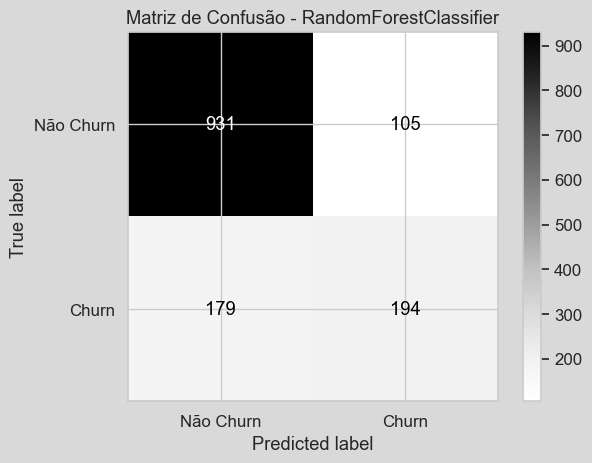

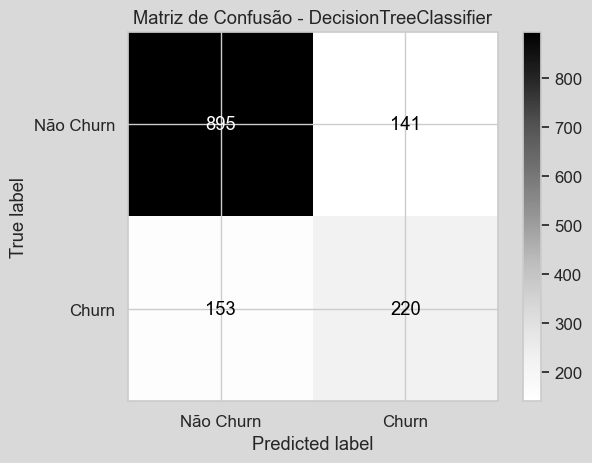

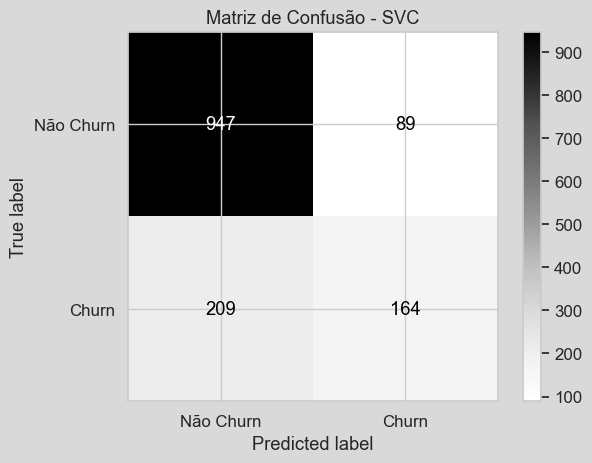

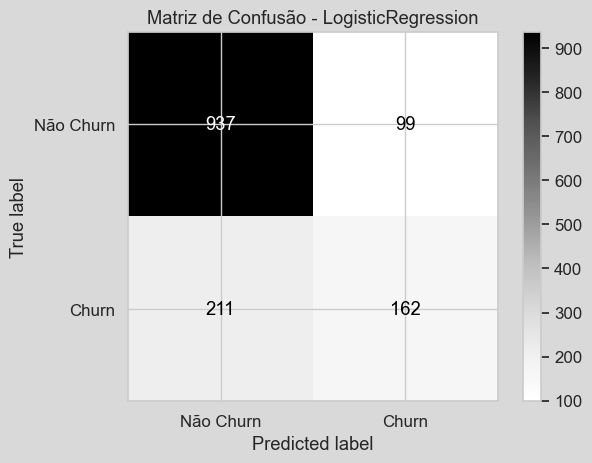

In [903]:
# Lista para armazenar os resultados de cada modelo
results = []

# Calcular custo do baseline (não usar nenhum modelo → perder todos os clientes com churn real)
baseline_indices = y_test[y_test == 1].index
baseline_data = data.loc[baseline_indices]
custo_baseline = (baseline_data['MonthlyCharges'] * baseline_data['Contract']).sum()

# Iterar sobre os modelos em grid_search_results
for idx, grid_search in enumerate(grid_search_results):
    best_model = grid_search.best_estimator_

    # Nome do modelo
    if hasattr(best_model, "steps"):
        model_name = type(best_model.steps[-1][1]).__name__
    else:
        model_name = type(best_model).__name__

    # Previsões e probabilidades
    y_pred = best_model.predict(X_test)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_scores = best_model.decision_function(X_test)
        y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())

    # Métricas clássicas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Índices dos FNs
    fn_indices = (y_test == 1) & (y_pred == 0)
    fn_data = data.loc[y_test[fn_indices].index]
    custo_fn = (fn_data['MonthlyCharges'] * fn_data['Contract']).sum()
    custo_fp_total = fp * FP_COST
    custo_total = custo_fp_total + custo_fn

    # Guardar resultados detalhados
    results.append({
        "Modelo": model_name,
        "Precisão": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "ROC AUC": round(roc_auc, 4),
        "FNs": fn,
        "Custo médio FN (€)": round(custo_fn / fn if fn else 0, 2),
        "Custo FP (€)": round(custo_fp_total, 2),
        "Custo FN (€)": round(custo_fn, 2),
        "Custo Total (€)": round(custo_total, 2),
        "Custo Base (€)": round(custo_baseline, 2),
        "Poupança (€)": round(custo_baseline - custo_total, 2)
    })

    # Matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Churn", "Churn"])
    disp.plot(cmap="Greys", values_format='d')
    plt.title("Matriz de Confusão - " + model_name)

# Criar DataFrame final com todos os resultados
results_df = pd.DataFrame(results)
results_df

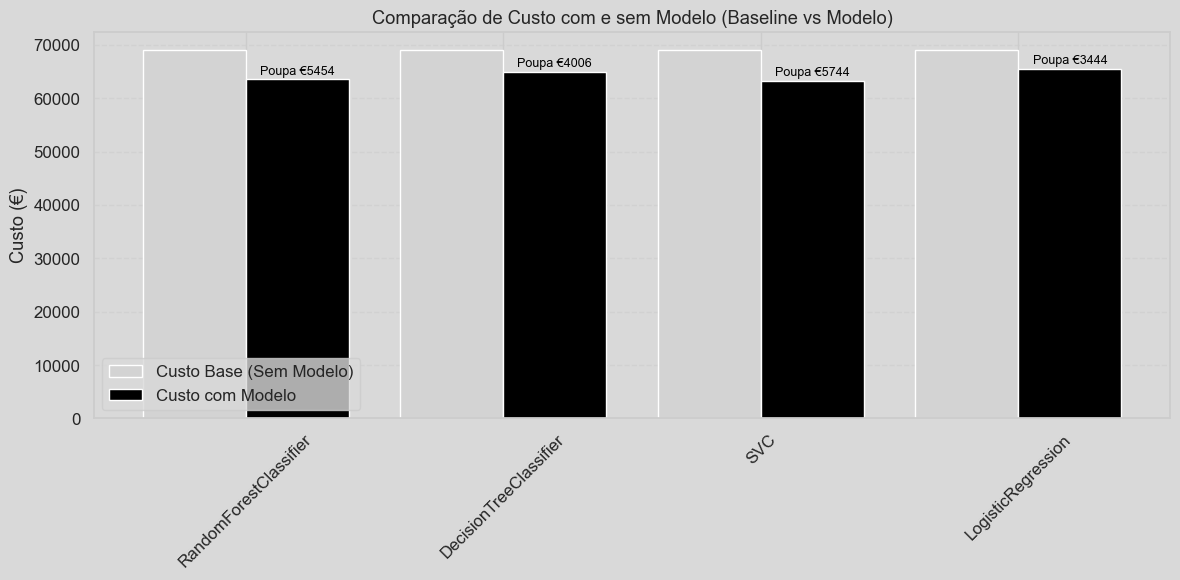

In [892]:
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(results_df))

# Barras: Custo sem modelo (baseline) - cinzento claro
plt.bar(x, results_df["Custo Base (€)"], width=bar_width, label="Custo Base (Sem Modelo)", color="lightgray")

# Barras: Custo com modelo - preto
plt.bar([i + bar_width for i in x], results_df["Custo Total (€)"], width=bar_width, label="Custo com Modelo", color="black")

# Anotações da poupança
for i, val in enumerate(results_df["Poupança (€)"]):
    plt.text(i + bar_width, results_df["Custo Total (€)"][i] + 1000, f'Poupa €{int(val)}', ha='center', fontsize=9, color='black')

# Personalização dos eixos e título
plt.xticks([i + bar_width / 2 for i in x], results_df["Modelo"], rotation=45)
plt.ylabel("Custo (€)")
plt.title("Comparação de Custo com e sem Modelo (Baseline vs Modelo)")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar o gráfico
plt.show()


---

# Conclusão

---

Após a avaliação de vários modelos de machine learning, analisaram-se as métricas de desempenho mais relevantes para o problema de previsão de churn, nomeadamente: precisão, recall, F1-score, ROC AUC e o impacto no custo de negócio.

Dado que o principal objetivo é identificar clientes com maior probabilidade de cancelar o serviço, métricas como o recall e o F1-score assumem particular importância — uma vez que permitem, não só detetar um maior número de casos reais de desistência, como também manter um equilíbrio entre verdadeiros positivos e falsos positivos.

Entre os modelos avaliados, o Random Forest destacou-se como a opção mais equilibrada, apresentando o melhor desempenho global, com um valor de ROC AUC de 0.8428 e uma boa relação entre precisão e recall (F1-score de 0.5774). Este modelo revelou-se robusto, estável e com boa capacidade de generalização.

Apesar de o modelo SVM ter apresentado um custo total ligeiramente inferior, tal diferença deveu-se ao facto de os seus erros incidirem maioritariamente sobre clientes de menor valor, o que suavizou o impacto no custo. No entanto, como não foi possível confirmar se esse comportamento resulta de um padrão real ou apenas de coincidência, optou-se por não o considerar como o modelo principal.

Assim, tendo em conta o equilíbrio entre desempenho, consistência e impacto no negócio, o modelo Random Forest foi selecionado como a melhor solução para a previsão de churn neste contexto.